In [1]:
pip install numpy pandas scikit-learn


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import numpy as np


In [3]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Adding the target variable

# View the first few rows of the dataset
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Separate features and target variable
X = df.drop('MedHouseVal', axis=1)  # All columns except 'MedHouseVal'
y = df['MedHouseVal']               # 'MedHouseVal' column as target


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

<ipython-input-9-e50c9a5a0dbb>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


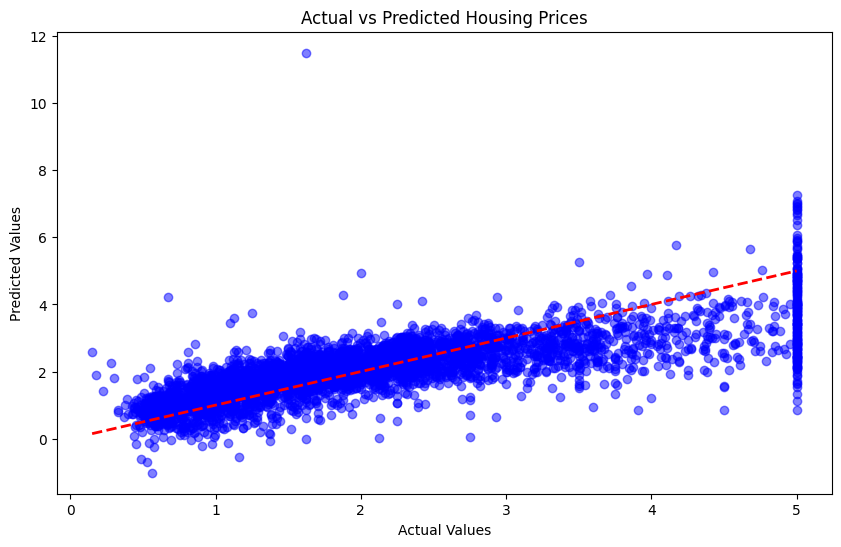

In [9]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.5558915986952444
R² Score: 0.5757877060324508


In [12]:
# Example new data point
new_data = pd.DataFrame({
    'MedInc': [8.3252],     # Median income
    'HouseAge': [20.0],     # Median house age
    'AveRooms': [8.9841],   # Average number of rooms
    'AveBedrms': [1.0238],  # Average number of bedrooms
    'Population': [322.0],  # Population in the block
    'AveOccup': [2.5556],   # Average occupancy
    'Latitude': [37.88],    # Latitude of the block
    'Longitude': [-122.23]  # Longitude of the block
})

# Predict the housing price
predicted_price = model.predict(new_data)
print(f"Predicted Housing Price: ${predicted_price[0] * 100000:.2f}")  # Convert to USD scale


Predicted Housing Price: $370108.23
